#**TensorFlow Image Augmentation Tutorial**

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/images/image_augmentation">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/image_augmentation.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/image_augmentation.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
</table>

This tutorial explains how to augment images using [tf.image](https://www.tensorflow.org/api_docs/python/tf/image), and training a [keras model](https://www.tensorflow.org/guide/keras/overview) using the augmented data.

# Select Tensorflow version 2.x

In [1]:
# select TensorFlow 2.0 environment
%tensorflow_version 2.x

TensorFlow 2.x selected.


# Import the necessary components for training the model & data augmentation.
First, we will import `tensorflow`, along with `tensorflow_datasets`. We will use images from a tensorflow dataset for augmentation.

Next, import `keras` from `tensorflow`. This will be used for training a model with the augmented images.

Finally, import `pyplot` from `matplotlib` to show our unaugmented and augmented images.

In [0]:
from tensorflow import keras
from matplotlib import pyplot
import tensorflow_datasets as tfds
import tensorflow as tf
import random

# Load in the fashion dataset, and pre process the images. Then, show 9 unaugmented images.

We will first load in a dataset (in this case the fashion dataset). We will then pre-process the images a little bit, then show 9 of the unaugmented images.

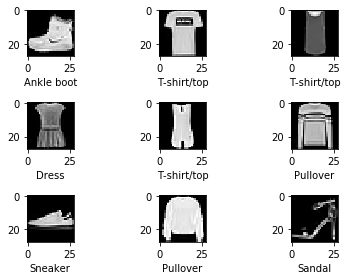

In [3]:
# Load in dataset
dataset = keras.datasets.fashion_mnist
(training_images, training_labels), (testing_images, testing_labels) = dataset.load_data()

unaltered_images = training_images

# Pre-process the images
training_images = training_images / 255.0
unaltered_images = unaltered_images / 255.0
testing_images = testing_images / 255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.tight_layout()
	pyplot.xlabel(class_names[training_labels[i]])
	pyplot.imshow(training_images[i], cmap=pyplot.get_cmap('gray'))

# Augment the images!
Now we will augment the images, and show 9 of the augmented images!

### Importance of augmentation
Augmentation is very important, because it can help improve the generalizability of our model. It also helps reduce over fitting our data. By artificially augmenting images, we are exposing our model to more data, which helps it detect much more than it would if the data was not augmented.

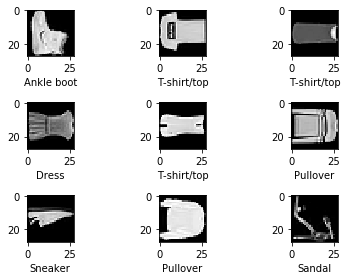

In [4]:
# Prepare images for augmentation
training_images = training_images.reshape((training_images.shape[0], 28, 28, 1))
training_images = training_images.astype('float32')

# Prepare images for augmentation
unaltered_images = unaltered_images.reshape((unaltered_images.shape[0], 28, 28, 1))
unaltered_images = unaltered_images.astype('float32')

# Prepare images for testing model
testing_images = testing_images.reshape((testing_images.shape[0], 28, 28, 1))
testing_images = testing_images.astype('float32')


# Augment the images with tf.image
def augment_image(x: tf.Tensor) -> tf.Tensor:
  # Changes the brightness to a random value between 0.1 and 0.9
  new_x = tf.image.adjust_brightness(x, random.uniform(0.1, 0.9))

  # Changes the contrast to a random value between 0.1 and o.9
  new_x = tf.image.adjust_contrast(images=new_x, contrast_factor=random.uniform(0.1, 0.9))

  # Rotate the image 0, 90, 180, 270, or 360 degrees, chosen randomly
  new_x = tf.image.rot90(new_x, k=random.randrange(0, 4))

  # Return the augmented image
  return new_x

# Loop through and augment the training images
for index, image in enumerate(training_images):
		training_images[index] = augment_image(image)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Create a grid of 9 images
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.tight_layout()
	pyplot.xlabel(class_names[training_labels[i]])
	pyplot.imshow(training_images[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
# Show the images
pyplot.show()

# Build and train the keras model!
If you would like, you may now train a keras model with the augmented images. First, create and compile the model, then train it with our augmented images!

In [5]:
def retrieve_model():
  # Prepare the layers for training with keras
  model = keras.Sequential([
      keras.layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)),
      keras.layers.MaxPooling2D((2, 2)),
      keras.layers.Conv2D(56, (3, 3), activation='relu'),
      keras.layers.MaxPooling2D((2, 2)),
      keras.layers.Conv2D(56, (3, 3), activation='relu'),

      keras.layers.Flatten(),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(10, activation='softmax')
  ])

  return model

model = retrieve_model()
# Compile the model for training with keras
model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

unaugmented_model = retrieve_model()
# Compile the model for training with keras
unaugmented_model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with keras
model.fit(training_images, training_labels, epochs=5, validation_data=(testing_images, testing_labels))

# Train the model with unaugmented images
unaugmented_model.fit(unaltered_images, training_labels, epochs=5, validation_data=(testing_images, testing_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 61s 1ms/sample - loss: 1.0634 - accuracy: 0.6237 - val_loss: 0.8027 - val_accuracy: 0.7163
Epoch 2/5
60000/60000 [==============================] - 59s 975us/sample - loss: 0.6565 - accuracy: 0.7678 - val_loss: 0.6047 - val_accuracy: 0.7863
Epoch 3/5
60000/60000 [==============================] - 57s 952us/sample - loss: 0.5551 - accuracy: 0.8029 - val_loss: 0.6347 - val_accuracy: 0.7886
Epoch 4/5
60000/60000 [==============================] - 60s 995us/sample - loss: 0.4936 - accuracy: 0.8249 - val_loss: 0.5397 - val_accuracy: 0.8169
Epoch 5/5
60000/60000 [==============================] - 58s 973us/sample - loss: 0.4495 - accuracy: 0.8393 - val_loss: 0.5107 - val_accuracy: 0.8329
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.4803 - accuracy: 0.8236 - val_loss: 0.3595 - val_accuracy: 0.8705
Epoc

# Now, let's evaluate the augmented and unaugmented models

In [6]:
# Evaluate the model on unaugmented images

# Prepare images for evaluation
testing_images = testing_images.reshape((testing_images.shape[0], 28, 28, 1))
testing_images = testing_images.astype('float32')

result = model.evaluate(testing_images, testing_labels, batch_size=128)
print('(AUGMENTED) Test loss, accuracy: ' + str(result))

unaugmented_result = unaugmented_model.evaluate(testing_images, testing_labels, batch_size=128)
print('(UNAUGMENTED) Test loss, accuracy: ' + str(unaugmented_result))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# Results
The results, contrary to what you may expect, show us that the unaugmented images produced a slightly better result.

In this tutorial, we augmented the images quite a bit (i.e. the brightness and contrast were set between very low and very high ranges). In practice, you may will want to augment your images as much. Small augmentation will produce a more accurate model than heavy augmentation, like the one in this tutorial.